# The Hot Ones - An Exploratory Data Analysis
### Pham Duy Anh Vu

*__________________________________________________________________________________________________________________________*

This dataset is about a youtube series called "The Hot Ones" where the host Sean Evans interviews celebrity guests and as the shows goes on, both the interviewer and interviewee eats a hot wing with increasing degree in heat.

The **original dataset** on tidytuesday is comprised of three small dataset called **"seasons"**, **"episodes"**, and **"sauce"** whereas the **aggregated dataset** called **"ratings"** comes from the IMDb server comprised of the IMDb ratings of each episodes as well as various other information.

###

In [1]:
import pandas as pd

In [2]:
# 1st dataset
seasons = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-08/seasons.csv')
episodes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-08/episodes.csv')
sauce = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-08/sauces.csv')

# 2nd dataset
ratings = pd.read_csv('https://raw.githubusercontent.com/duyanhh4/HotOnes-EDA/main/Datasets/WATCHLIST.csv')

In [3]:
seasons.head()

,season,episodes,note,original_release,last_release
0,1,8.0,NaN,2015-03-12,2015-10-22
1,2,40.0,NaN,2015-12-10,2016-12-22
2,3,24.0,NaN,2017-01-19,2017-06-29
3,4,24.0,NaN,2017-07-20,2017-12-28
4,5,16.0,NaN,2018-01-18,2018-05-03


In [4]:
# cleaning data

seasons.isnull().sum()
seasons.drop("note", inplace = True, axis = 1)
seasons.dropna(inplace = True)

In [5]:
seasons.to_csv("seasons_cleaned.csv", index = False)
seasons

,season,episodes,original_release,last_release
0,1,8.0,2015-03-12,2015-10-22
1,2,40.0,2015-12-10,2016-12-22
2,3,24.0,2017-01-19,2017-06-29
3,4,24.0,2017-07-20,2017-12-28
4,5,16.0,2018-01-18,2018-05-03
5,6,13.0,2018-06-07,2018-09-06
6,7,12.0,2018-10-04,2018-12-20
7,8,12.0,2019-01-24,2019-04-11
8,9,12.0,2019-05-30,2019-09-05
9,10,12.0,2019-09-19,2019-12-05


Looking at the **"sauce"** dataset, I noticed the whole **note** column only contained NaN values. I decided that because it wasn't necessary to what I was going to visualize, I removed the entire column. Same with the row **21** in the **season** column, because it was a new season that was still in progress and because there were too many variables (both necessary and unnecessary to the analysis) missing, I decided to also remove the row and from there, decided to only analyze up to **season 20**

*__________________________________________________________________________________________________________________________*

In [6]:
# cleaning data

episodes.isnull().sum()
episodes.dropna(inplace = True)

In [7]:
episodes.to_csv("episodes_cleaned.csv", index = False)
episodes

,season,episode_overall,episode_season,title,original_release,guest,guest_appearance_number,finished
0,1,1,1,Tony Yayo Talks Shmoney Dance and Eminem's Tac...,2015-03-12,Tony Yayo,1,False
1,1,2,2,Anthony Rizzo On Chicago Cubs Rivalries & Base...,2015-05-12,Anthony Rizzo,1,True
2,1,3,3,"Machine Gun Kelly Talks Diddy, Hangovers, & Am...",2015-06-11,Machine Gun,1,True
3,1,4,4,"Gunplay Talks Rick Ross, Wingstop, and X-Box L...",2015-06-23,Gunplay,1,True
4,1,5,5,"Ja Rule Talks 50 Cent Beef, Jail Recipes, and ...",2015-08-11,Ja Rule,1,True
...,...,...,...,...,...,...,...,...
295,21,296,6,John Mulaney Seeks the Truth While Eating Spic...,2023-06-29,John Mulaney,1,True
296,21,297,7,Lewis Capaldi Grasps for a Lifeline While Eati...,2023-07-06,Lewis Capaldi,1,True
297,21,298,8,Harry Kane Takes One For the Team While Eating...,2023-07-13,Harry Kane,1,True
298,21,299,9,John Stamos Falls Out of His Chair While Eatin...,2023-07-20,John Stamos,1,True


For the **episodes** dataset, I noticed that each row had a few N/A values but after digging deeper, it was limited to the same few rows. Because it was an insignificant number compared to the whole dataset, I decided to drop rows that had N/A values entirely
*__________________________________________________________________________________________________________________________*

In [8]:
sauce

,season,sauce_number,sauce_name,scoville
0,1,1,Texas Pete Original Hot Sauce,747
1,1,2,Cholula Original Hot Sauce,3600
2,1,3,El Yucateco Caribbean Hot Sauce – Chile Habanero,5790
3,1,4,Lottie's Traditional Barbados Yellow Hot Peppe...,12000
4,1,5,Pain is Good – Louisiana Style,13000
...,...,...,...,...
205,21,6,The Spicy Shark – Mako Snake,71000
206,21,7,Adoboloco Jalapeño Chico,103000
207,21,8,Da' Bomb – Beyond Insanity,135600
208,21,9,Alchemy Peppers – Watermelon Ghost,641000


In [9]:
# cleaning data

sauce.isnull().sum()

season          0
sauce_number    0
sauce_name      0
scoville        0
dtype: int64

In [10]:
sauce.to_csv("sauce_cleaned.csv", index = False)
sauce

,season,sauce_number,sauce_name,scoville
0,1,1,Texas Pete Original Hot Sauce,747
1,1,2,Cholula Original Hot Sauce,3600
2,1,3,El Yucateco Caribbean Hot Sauce – Chile Habanero,5790
3,1,4,Lottie's Traditional Barbados Yellow Hot Peppe...,12000
4,1,5,Pain is Good – Louisiana Style,13000
...,...,...,...,...
205,21,6,The Spicy Shark – Mako Snake,71000
206,21,7,Adoboloco Jalapeño Chico,103000
207,21,8,Da' Bomb – Beyond Insanity,135600
208,21,9,Alchemy Peppers – Watermelon Ghost,641000


There was no wrong values in the **sauce** dataset so I kept it as it is
*__________________________________________________________________________________________________________________________*

In [11]:
ratings.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Unnamed: 14
0,1,tt7077144,12/9/2023,12/9/2023,NaN,Hot Ones: Tony Yayo Talks Shmoney Dance & Emin...,https://www.imdb.com/title/tt7077144/,tvEpisode,5.3,5.0,2015,"Comedy, Talk-Show",24.0,2015-03-12,NaN
1,2,tt6559584,12/9/2023,12/9/2023,NaN,Hot Ones: Anthony Rizzo on Chicago Cubs Rivalr...,https://www.imdb.com/title/tt6559584/,tvEpisode,5.8,10.0,2015,"Comedy, Talk-Show",20.0,2015-05-12,NaN
2,3,tt6559824,12/9/2023,12/9/2023,NaN,"Hot Ones: Machine Gun Kelly Talks Diddy, Hango...",https://www.imdb.com/title/tt6559824/,tvEpisode,5.6,15.0,2015,"Comedy, Talk-Show",25.0,2015-06-11,NaN
3,4,tt6563412,12/9/2023,12/9/2023,NaN,"Hot Ones: Gunplay Talks Rick Ross, Wingstop, a...",https://www.imdb.com/title/tt6563412/,tvEpisode,6.7,15.0,2015,"Comedy, Talk-Show",17.0,2015-06-23,NaN
4,5,tt6563418,12/9/2023,12/9/2023,NaN,"Hot Ones: Ja Rule Talks 50 Cent Beef, Jail Rec...",https://www.imdb.com/title/tt6563418/,tvEpisode,6.4,18.0,2015,"Comedy, Talk-Show",17.0,2015-08-11,NaN


In [12]:
# cleaning data

ratings.isnull().sum()
ratings.drop(["Description", "URL", "Unnamed: 14"], inplace = True, axis = 1)
ratings["Runtime (mins)"].fillna(ratings["Runtime (mins)"].mode()[0], inplace = True)

ratings["IMDb Rating"].fillna(ratings["IMDb Rating"].mean(), inplace = True)
ratings["Num Votes"].fillna(ratings["Num Votes"].mean(), inplace = True)

In [13]:
ratings.to_csv("ratings_cleaned.csv", index = False)
ratings

,Position,Const,Created,Modified,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date
0,1,tt7077144,12/9/2023,12/9/2023,Hot Ones: Tony Yayo Talks Shmoney Dance & Emin...,tvEpisode,5.300000,5.0,2015,"Comedy, Talk-Show",24.000000,2015-03-12
1,2,tt6559584,12/9/2023,12/9/2023,Hot Ones: Anthony Rizzo on Chicago Cubs Rivalr...,tvEpisode,5.800000,10.0,2015,"Comedy, Talk-Show",20.000000,2015-05-12
2,3,tt6559824,12/9/2023,12/9/2023,"Hot Ones: Machine Gun Kelly Talks Diddy, Hango...",tvEpisode,5.600000,15.0,2015,"Comedy, Talk-Show",25.000000,2015-06-11
3,4,tt6563412,12/9/2023,12/9/2023,"Hot Ones: Gunplay Talks Rick Ross, Wingstop, a...",tvEpisode,6.700000,15.0,2015,"Comedy, Talk-Show",17.000000,2015-06-23
4,5,tt6563418,12/9/2023,12/9/2023,"Hot Ones: Ja Rule Talks 50 Cent Beef, Jail Rec...",tvEpisode,6.400000,18.0,2015,"Comedy, Talk-Show",17.000000,2015-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,tt28358536,12/9/2023,12/9/2023,Hot Ones: Harry Kane Takes One for the Team Wh...,tvEpisode,7.700000,22.0,2023,"Comedy, Talk-Show",7.000000,2023-07-13
310,311,tt28452944,12/9/2023,12/9/2023,Hot Ones: John Stamos Falls Out of His Chair W...,tvEpisode,8.400000,22.0,2023,"Comedy, Talk-Show",7.000000,2023-07-20
311,312,tt28506622,12/9/2023,12/9/2023,Hot Ones: Stephen Curry is on Fire While Eatin...,tvEpisode,7.500763,22.0,2023,"Comedy, Talk-Show",17.637405,2023-07-28
312,313,tt28555513,12/9/2023,12/9/2023,Hot Ones: Anitta Lets It Fly While Eating Spic...,tvEpisode,6.800000,22.0,2023,"Comedy, Talk-Show",5.000000,2023-08-03


The **ratings** dataset was the dataset that had the most changes to it as there was a lot of N/A values from the missing information from the IMDb database. 

I first dropped the three columns that had the most N/A values that were also not needed in my analysis, the **"Description"** column, the **"URL"** column, and the **"Unnamed: 14"** column.

I then decided decided to replace the missing values in the **IMDb Rating** and **Num Votes** columns with the mean values of each as dropping 52 rows worth of value is not feasible considering there are about 350 rows in total
*__________________________________________________________________________________________________________________________*

In [14]:
pd.merge(episodes, ratings, left_on = 'original_release', right_on = 'Release Date')\
    .groupby(['Year', "finished"]).agg({"IMDb Rating":"mean"}).reset_index()

,Year,finished,IMDb Rating
0,2015,False,4.650000
1,2015,True,6.450000
2,2016,False,7.000000
3,2016,True,7.405714
4,2017,False,7.450382
5,2017,True,7.554545
6,2018,False,6.733333
7,2018,True,7.478947
8,2019,False,7.750000
9,2019,True,7.682375


In [15]:
pd.merge(episodes, ratings, left_on = 'original_release', right_on = 'Release Date')\
    .groupby("finished").agg({"IMDb Rating":"mean"}).reset_index()

,finished,IMDb Rating
0,False,6.873486
1,True,7.552680


After doing a bit of research on the Youtube show itself, the first question that popped up on my mind (that was also based on the available datasets) was whether if the episodes got a higher rating if the guests completed the challenge of eating all 10 wings.

By merging the **episodes** dataset with the **ratings** dataset and grouping it by the **finished** column along with aggregating it with the **mean** of **IMDb Rating**, I got the answer I was looking for. To my expectations, it was infact true that if the guest finished the challenge, the episodes generally had higher ratings except for one outlier year in 2019. 

I then furthered this analysis by seeing the series as a whole, whether the IMDb Ratings were higher when the guest finished the challenge. The result from this was an approximate 0.7 IMDb rating deviation between each other.

These two analysis corresponds to **Visual 1** in the Power Bi graph in the Github link below:

https://github.com/duyanhh4/HotOnes-EDA/blob/main/Analysis/hotones_visualization.pbix

*__________________________________________________________________________________________________________________________*

In [16]:
guest_info = pd.merge(episodes, ratings, left_on = 'original_release', right_on = 'Release Date')
guest_info[["guest", "IMDb Rating", "finished"]].sort_values("IMDb Rating", ascending = False).iloc[0:10]

,guest,IMDb Rating,finished
244,Josh Brolin,9.1,True
208,Jeffrey Dean,9.1,True
274,Pedro Pascal,9.0,True
163,Paul Rudd,8.9,True
257,David Blaine,8.8,True
31,Bert Kreischer,8.8,True
70,Brett Baker (superfan),8.8,True
159,Shia LaBeouf,8.7,True
83,Gary Vaynerchuk,8.7,True
268,Paul Dano,8.6,True


The next analysis I had was simpler than the first but it was also something I genuinely was curious. That was which guests on the Hot Ones show had the best IMDb rating. 

Through the code above, I limited the results to the top 10 guests and based on the results, it actually surprised me quite a bit. I compared the results to Youtube views and non of the guests here (except for Shia LaBeouf) was in the top 20 of most viewed videos. (I couldn't compare it directly by code as I couldn't find any databases online that also included the view count of each video.)

I furthered this analysis a bit more by seeing whether these guests also finished all 10 wings and sure enough, they all did finish the challenge. 

This analysis corresponds to **Visual 3** on the Power Bi link above.
*__________________________________________________________________________________________________________________________*

In [17]:
wings = episodes.merge(sauce, on = "season", how = "left")
wings[wings["sauce_number"] == 10]\
    .groupby("sauce_name")\
    .agg({"finished":"sum", "sauce_name":"count"})\
    .rename(columns={"finished": "total_finished", "sauce_name": "times_appeared"})\
    .sort_values("total_finished", ascending = False)\
    .reset_index()

,sauce_name,total_finished,times_appeared
0,Hot Ones – The Last Dab: Apollo,104,106
1,Blair's Mega Death Sauce,60,64
2,Hot Ones – The Last Dab Reduxx,36,38
3,Hot Ones – The Last Dab XXX,29,31
4,The Last Dab,22,23
5,Hot Ones – The Last Dab (Reaper Edition),15,16
6,Hot Ones – The Last Dab: Reduxx,11,12
7,Mad Dog 357,6,8


Looking through the data, I noticed that over the 20 seasons, the show changed the final (spiciest) sauce several times. That made me wonder whether the change in sauce had any difference in if the guest was able to finish the challenge or not. 

Through the code and output above, I was rather surprised at the results as the overwhemingly majority of the time, once the guest made it to the final sauce, they completed the challenge. The **total_finished** column shows the number of times a guest finished the challenge with the specific sauce as the final wing and the **times_appeared** column shows the number of times the guest reached the final stage with that sauce as the final sauce.

During visualizing this graph, I ran into many difficulties using both Power Bi and Seaborn library, I couldn't successfully graph it the way I wanted due to the way I manipulated the values of the two columns. Because of this, I had to manually set up a graph using an online application to create the graph I wanted to visualize the data. The result of this is shown in the graph below.

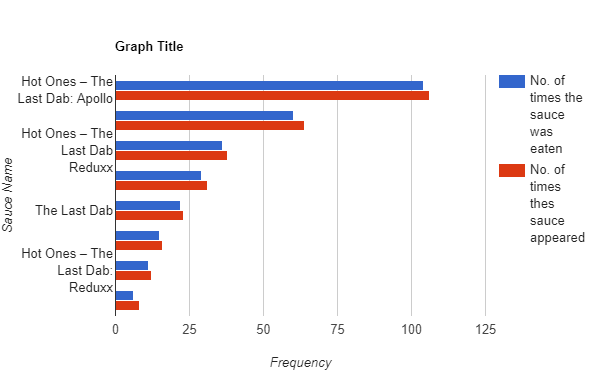